Epoch 1/5


C:\Users\Anushka\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7492 - loss: 0.7061 - val_accuracy: 0.8558 - val_loss: 0.3971
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8763 - loss: 0.3451 - val_accuracy: 0.8821 - val_loss: 0.3306
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8934 - loss: 0.2911 - val_accuracy: 0.8855 - val_loss: 0.3197
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9058 - loss: 0.2577 - val_accuracy: 0.8948 - val_loss: 0.2874
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9118 - loss: 0.2406 - val_accuracy: 0.9030 - val_loss: 0.2682
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.2744
Test accuracy: 0.9030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

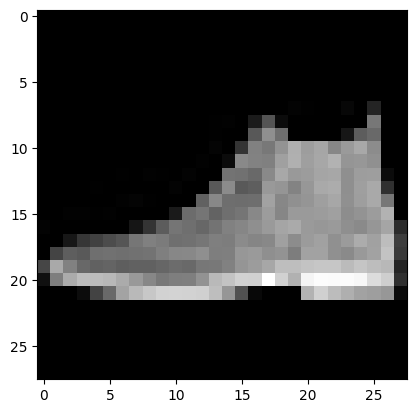

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
print(train_labels.unique())
# Normalize the images to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape to 4D tensor (samples, height, width, channels)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# 6. Define the list of class names (Fashion MNIST labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





In [20]:
def predict(model, image):
    """
    Predict the class of a given image.
    Arguments:
    model -- trained CNN model
    image -- image to classify (numpy array of shape (28, 28))
    """
    # Preprocess image: normalize and reshape to the model's input shape
    image = image.reshape((1, 28, 28, 1))  # Reshaping to (1, 28, 28, 1)
    
    # Make prediction
    prediction = model.predict(image)
    print(prediction)
    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)
    
    # Return the predicted class index
    return predicted_class


(28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[3.9763921e-03 1.6444465e-05 9.9077737e-01 1.8118886e-05 6.8849139e-04
  8.3447958e-07 4.4587608e-03 3.9199758e-08 5.8192876e-05 5.3549825e-06]]


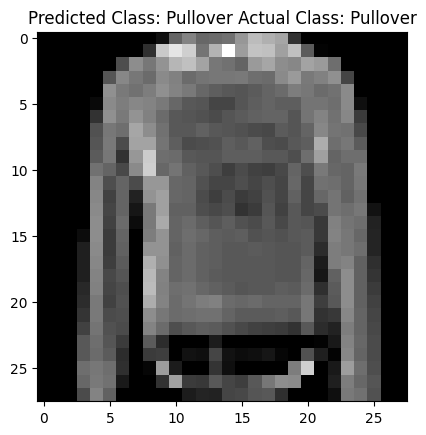

In [22]:
# Show the image and the prediction
# 8. Predict using the function on the first test image
sample_image = test_images[16] # Get the first test image
# Use the predict function to get the class
predicted_class = predict(model, test_images[16])
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_class]} Actual Class: {class_names[np.argmax(test_labels[16])]}")
plt.show()


In [18]:
train_labels[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]
